#**Netflix Original Films and IMDB Scores Dataset**

#**Data Profiling**

In [14]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=116164538cce96e656bdc4e5323befcf9cf2904aa76fd3383e15d050ecf47b58
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [50]:
#Chaine Libraries haru ko installation
import pandas as pd
from ydata_profiling import ProfileReport  #it's for running ProfileReport() method

#file ko path upload gareko
path = "/content/NetflixOriginals.csv"
df = pd.read_csv(path, encoding='ISO-8859-1') #Read the CSV file using 'ISO-8859-1' encoding to avoid Unicode decoding errors
profile = ProfileReport(df, title="Netflix Original Films and IMDB Scores Dataset", explorative=True)
display(profile)

#check columns, data types, and non-null counts.
df.info()

#df.head() method le first 5 rows lai print garxa
df.head()

# df.describe() for numerical feature statistics(mean,median,mode)
df.describe()

#categorical feature distributions ko lagi use gareko
df.value_counts()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 12.23it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


,,,,,,count
Title,Genre,Premiere,Runtime,IMDB Score,Language,
Òlòt?ré,Crime drama,"October 2, 2020",106,5.5,English,1
#REALITYHIGH,Comedy,"September 8, 2017",99,5.2,English,1
13th,Documentary,"October 7, 2016",100,8.2,English,1
13th: A Conversation with Oprah Winfrey & Ava DuVernay,Aftershow / Interview,"January 26, 2017",36,7.1,English,1
15 August,Comedy-drama,"March 29, 2019",124,5.8,Marathi,1
...,...,...,...,...,...,...
A California Christmas,Romantic comedy,"December 14, 2020",107,5.8,English,1
A Babysitter's Guide to Monster Hunting,Comedy/Fantasy/Family,"October 15, 2020",98,5.4,English,1
A 3 Minute Hug,Documentary,"October 28, 2019",28,6.5,English/Spanish,1


#**Data Quality Checks**

In [23]:
#Misisng Values Check garne
print("Missing Values in Each Column :")
df.isnull().sum()


# Handle missing values Handle garne some codes
# Missing numerical values lai median ko help bata fill gareko
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Missing categorical values lai mode ko help le fill gareko
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n Missing values handled.")

# Duplicates lai check gareko
print("\n Number of duplicate rows:")
print(df.duplicated().sum())

# Duplicates lai remove if kunai xa bhane
df = df.drop_duplicates()
print("Duplicates removed.")

# data types lai verfiy ra adjust gareko
print("\n Data types before conversion:")
print(df.dtypes)

# Optional: Convert object (string) columns to category
for col in categorical_columns:
    df[col] = df[col].astype('category')

print("\n Converted object columns to category:")
print(df.dtypes)


Missing Values in Each Column :

 Missing values handled.

 Number of duplicate rows:
0
Duplicates removed.

 Data types before conversion:
Title         category
Genre         category
Premiere      category
Runtime          int64
IMDB Score     float64
Language      category
dtype: object

 Converted object columns to category:
Title         category
Genre         category
Premiere      category
Runtime          int64
IMDB Score     float64
Language      category
dtype: object


#**Visualizations**

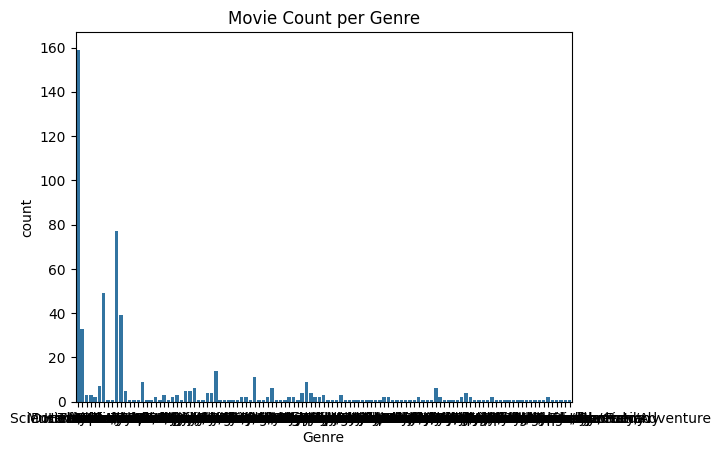

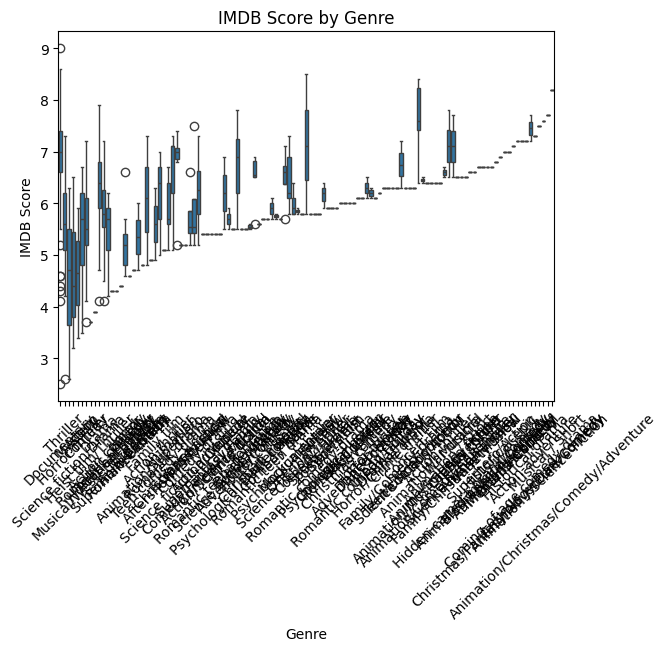

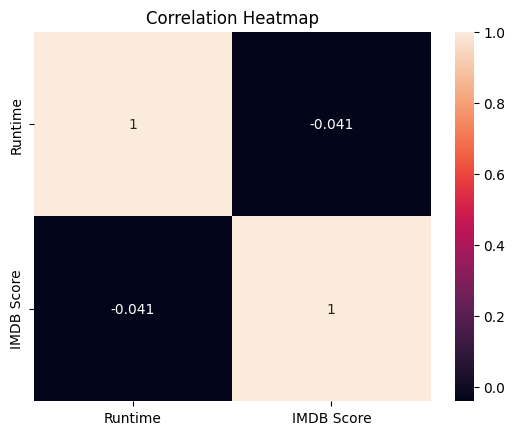

<ipython-input-38-7aa184866832>:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['IMDB Score'], shade=True)


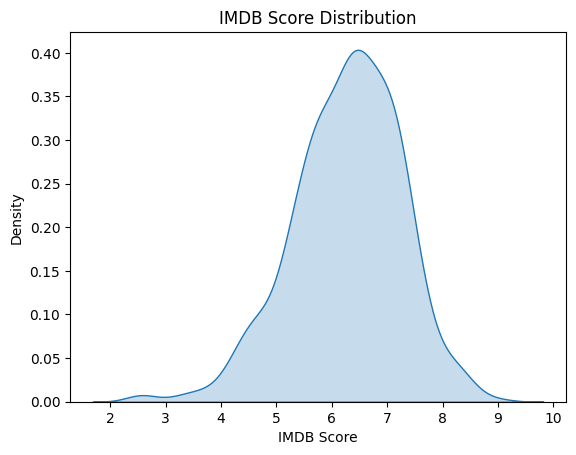

In [38]:
# Univariate

#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Count of movies in each Genre
sns.countplot(x='Genre', data=df)
plt.title("Movie Count per Genre")
# plt.xticks(rotation=45)  #Rotate x-axis labels by 45 degrees for better readability
plt.show()


# Bivariate
sns.boxplot(x='Genre', y='IMDB Score', data=df)
plt.title("IMDB Score by Genre")
plt.xticks(rotation=45) #Rotate x-axis labels by 45 degrees for better readability
plt.show()


# Correlation
#Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

#Distribution
#KDE plot(Kernel Density Estimate)
sns.kdeplot(df['IMDB Score'], shade=True)
plt.title("IMDB Score Distribution")
plt.xlabel("IMDB Score")
plt.show()




#**Outlier Detection and Handling**

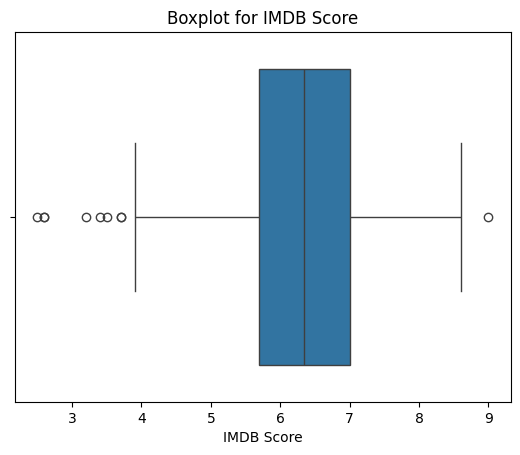

Original number of rows: 584
After removing outliers: 575


In [42]:
#Box plot use gareko outliers find garna ko lagi

sns.boxplot(x=df['IMDB Score'])  #Box plotcreate gareko to visualize the distribution of IMDB Scores and identify any outliers
plt.title("Boxplot for IMDB Score")
plt.show()


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['IMDB Score'].quantile(0.25)
Q3 = df['IMDB Score'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_no_outliers = df[(df['IMDB Score'] >= lower_bound) & (df['IMDB Score'] <= upper_bound)]


# Outliers lai compare gareko before and afterS
print("Original number of rows:", len(df))
print("After removing outliers:", len(df_no_outliers))




#**Feature Engineering**

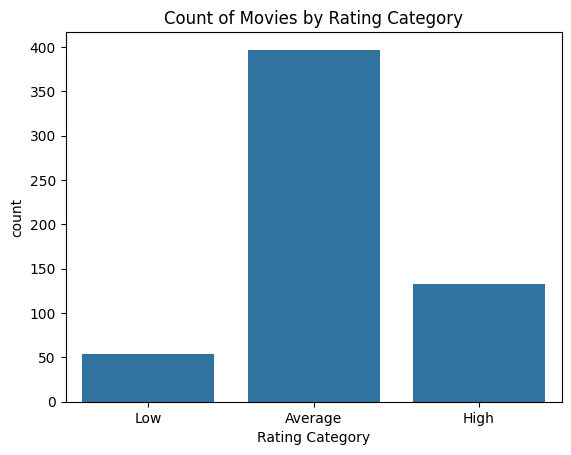

In [46]:
# IMDB Scores label ko function lai define gareko
# Create a new column 'Rating Category' to group IMDB Scores into Low, Average, and High

def categorize_rating(score):
    if score < 5:
        return 'Low'
    elif score <= 7:
        return 'Average'
    else:
        return 'High'

# IMDB Score column ma function lai apply gareko
df['Rating Category'] = df['IMDB Score'].apply(categorize_rating)

# Display the first 5 rows showing movie titles, their IMDB scores, and the new rating category
df[['Title', 'IMDB Score', 'Rating Category']].head()

# Draw a count plot to see how many movies fall into each rating group
sns.countplot(x='Rating Category', data=df)
plt.title("Count of Movies by Rating Category")
plt.show()




#**Summarize Findings**

#1. Most Netflix Original films have average IMDB scores between
   # 5 and 7.
#2. The mean and median IMDB score is about 6.3.
#3. There are some outliers with very low or very high scores.
#4. Missing values and duplicates were checked and handled.
#5.Numerical features show low correlation with each other.